In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [5]:
import pandas as pd

relatorio = {
    'TV': [23.1, 44.5, 170.2],
    'Radio': [3.8, 0.0, 45.9],
    'Jornal': [69.2, 5.1, 0.0],
    'Lucro': [35.2, 27.7, 45.9],
}
df = pd.DataFrame(relatorio, index=['Janeiro', 'Fevereiro', 'Março'])
display(df)

,TV,Radio,Jornal,Lucro
Janeiro,23.1,3.8,69.2,35.2
Fevereiro,44.5,0.0,5.1,27.7
Março,170.2,45.9,0.0,45.9


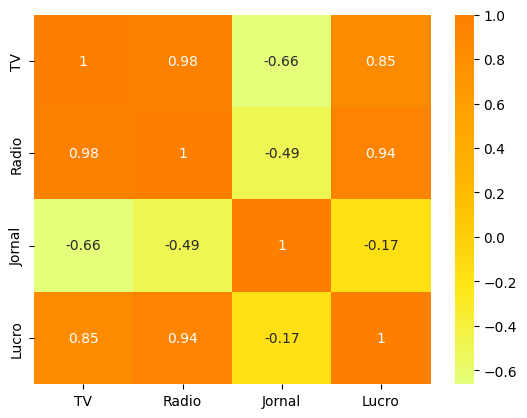

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap = 'Wistia', annot= True) 
plt.show()

## Responsável por dividir a base de dados em treino e teste.

In [7]:
from sklearn.model_selection import train_test_split 

y = df['Lucro'] 
x = df[['TV', 'Radio', 'Jornal']]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

## Treinado as IAs

In [8]:
from sklearn.linear_model import LinearRegression # -> Regressão linear
from sklearn.ensemble import RandomForestRegressor # -> RandomForest (arvore de decisão)


modelo_regressao_linear = LinearRegression() 
modelo_arvore_decisao = RandomForestRegressor()


modelo_arvore_decisao.fit(x_treino, y_treino) 
modelo_regressao_linear.fit(x_treino, y_treino)

LinearRegression()

## Aplicado os testes. 

In [12]:
previsao_regressao_linear = modelo_regressao_linear.predict(x)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x)

from sklearn import metrics 

#imprimido as porcentagem de acertos da IA.
print(f'Regressão linear: {metrics.r2_score(y, previsao_regressao_linear)}') 
print(f'Arvore de decisão: {metrics.r2_score(y, previsao_arvore_decisao)}')

Regressão linear: 0.36389580716703385
Arvore de decisão: 0.07965829315909423


# Realizado a previsão.  

In [13]:
novo_relatorio = {
    'You tube': [45.3, 42.1, 50.8],
    'Deezer': [30.2, 27.4, 31.2],
    'Spotify': [23.1, 20.9, 16.4],
}

df = pd.DataFrame(novo_relatorio, index=['Janeiro', 'Fevereiro', 'Março'])

previsao = modelo_arvore_decisao.predict(df)
df['Previsão de Lucro'] = previsao
display(df)

C:\Users\Johnson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Deezer
- Spotify
- You tube
Feature names seen at fit time, yet now missing:
- Jornal
- Radio
- TV

  warnings.warn(message, FutureWarning)


,You tube,Deezer,Spotify,Previsão de Lucro
Janeiro,45.3,30.2,23.1,41.834
Fevereiro,42.1,27.4,20.9,41.834
Março,50.8,31.2,16.4,41.834
